<a href="https://colab.research.google.com/github/Niushamesgari/Deep-learning-project/blob/main/Copy_of_Using_RoboFLow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0TmfXz3UZSSiUMPMstoB")
project = rf.workspace("my-game-pics").project("my-game-pics")
version = project.version(5)
dataset = version.download("yolov8")





loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`


In [5]:
config_file_template = '''
names:
- Coyote
- Deer
- Hog
- Rabbit
- Raccoon
nc: 5
roboflow:
  license: CC BY 4.0
  project: my-game-pics
  url: https://universe.roboflow.com/my-game-pics/my-game-pics/dataset/5
  version: 5
  workspace: my-game-pics
test: /content/My-Game-Pics-5/test/images
train: /content/My-Game-Pics-5/train/images
val: /content/My-Game-Pics-5/valid/images

'''

with open('/content/My-Game-Pics-5/data.yaml', 'w') as f:
    f.write(config_file_template)

In [6]:
!pip install ultralytics

In [7]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml').load('yolov8n.pt')
  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/My-Game-Pics-5/data.yaml', epochs=20, imgsz=(644))

100%|██████████| 6.25M/6.25M [00:00<00:00, 98.8MB/s]

Transferred 355/355 items from pretrained weights


Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/My-Game-Pics-5/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=644, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/My-Game-Pics-5/train/labels... 8453 images, 201 backgrounds, 0 corrupt: 100%|██████████| 8453/8453 [00:10<00:00, 817.29it/s]


train: New cache created: /content/My-Game-Pics-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/My-Game-Pics-5/valid/labels... 673 images, 10 backgrounds, 0 corrupt: 100%|██████████| 673/673 [00:01<00:00, 560.63it/s]


val: New cache created: /content/My-Game-Pics-5/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 672 train, 672 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.73G       1.04      2.151      1.184         14        672: 100%|██████████| 529/529 [03:16<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.20it/s]


                   all        673       1011      0.822      0.507       0.63      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.42G      0.961      1.329      1.116         11        672: 100%|██████████| 529/529 [03:10<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]

                   all        673       1011      0.771      0.648      0.786      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G     0.9338      1.109      1.102         14        672: 100%|██████████| 529/529 [03:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.66it/s]


                   all        673       1011      0.776      0.613      0.703      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.43G     0.9022     0.9917      1.088         16        672: 100%|██████████| 529/529 [03:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.99it/s]

                   all        673       1011      0.633      0.751      0.738      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.42G     0.8557     0.8798      1.066          9        672: 100%|██████████| 529/529 [03:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]

                   all        673       1011       0.79      0.689      0.779      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.43G      0.828     0.8324       1.05         22        672: 100%|██████████| 529/529 [03:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.83it/s]

                   all        673       1011      0.853      0.738      0.848      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.43G     0.8019     0.7621      1.038         16        672: 100%|██████████| 529/529 [03:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        673       1011      0.926      0.749       0.88      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G     0.7757     0.7178      1.028         14        672: 100%|██████████| 529/529 [03:04<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]

                   all        673       1011      0.867      0.791      0.878      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.7647     0.6952      1.018          9        672: 100%|██████████| 529/529 [03:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.95it/s]


                   all        673       1011      0.927      0.755      0.871      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.41G     0.7487     0.6565      1.013         15        672: 100%|██████████| 529/529 [03:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.86it/s]

                   all        673       1011       0.92      0.804      0.904       0.63


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.55G     0.7233     0.5522      0.991          7        672: 100%|██████████| 529/529 [03:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.28it/s]

                   all        673       1011      0.909      0.845      0.924      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.42G      0.709     0.5255     0.9834          9        672: 100%|██████████| 529/529 [02:56<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.67it/s]

                   all        673       1011       0.87      0.834      0.902      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.42G     0.6904     0.5034     0.9764          9        672: 100%|██████████| 529/529 [02:56<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.84it/s]

                   all        673       1011      0.925       0.83      0.928      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.41G     0.6732     0.4704     0.9642          5        672: 100%|██████████| 529/529 [02:57<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.34it/s]

                   all        673       1011      0.916      0.884      0.942      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.42G      0.655     0.4418     0.9529          6        672: 100%|██████████| 529/529 [02:57<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.37it/s]

                   all        673       1011      0.937      0.876      0.945      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.42G     0.6471     0.4292     0.9495          8        672: 100%|██████████| 529/529 [02:56<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.71it/s]

                   all        673       1011      0.905      0.877      0.948      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.42G     0.6238     0.4006     0.9371          5        672: 100%|██████████| 529/529 [02:55<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.95it/s]

                   all        673       1011      0.921      0.877       0.95      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.41G     0.6141     0.3857     0.9333          7        672: 100%|██████████| 529/529 [02:57<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.55it/s]

                   all        673       1011      0.964      0.888      0.949      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.42G      0.599     0.3692     0.9294          9        672: 100%|██████████| 529/529 [02:56<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.79it/s]

                   all        673       1011      0.956      0.896      0.956      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.43G      0.581     0.3515      0.918          6        672: 100%|██████████| 529/529 [02:58<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.34it/s]

                   all        673       1011      0.952      0.918       0.96      0.699



20 epochs completed in 1.061 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.03it/s]


                   all        673       1011      0.951      0.918       0.96      0.698
                Coyote         45         47       0.95          1      0.991      0.843
                  Deer        300        426      0.969      0.901      0.958      0.715
                   Hog        165        344      0.937       0.89      0.943       0.67
                Rabbit         18         19      0.941      0.842      0.936      0.607
               Raccoon        139        175       0.96      0.954      0.972      0.655
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


In [8]:
model.export()

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 672, 672) BCHW and output shape(s) (1, 9, 9261) (5.9 MB)

TorchScript: starting export with torch 2.3.1+cu121...
TorchScript: export success ✅ 4.4s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (7.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=672  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=672 data=/content/My-Game-Pics-5/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'


0: 544x672 1 Raccoon, 22.0ms
1: 544x672 1 Raccoon, 22.0ms
2: 544x672 1 Deer, 22.0ms
3: 544x672 7 Raccoons, 22.0ms
Speed: 2.7ms preprocess, 22.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 672)


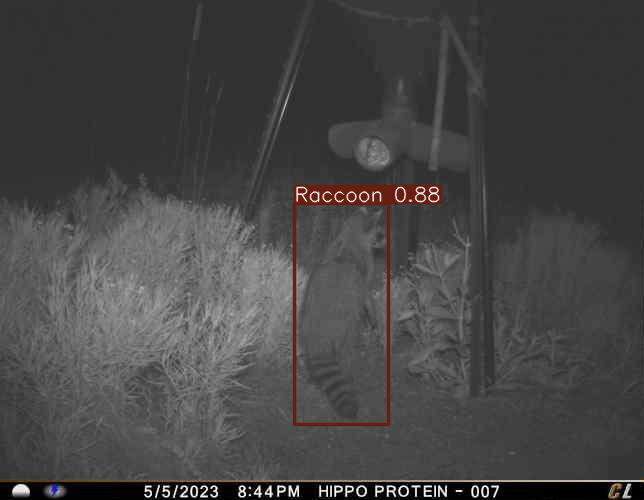

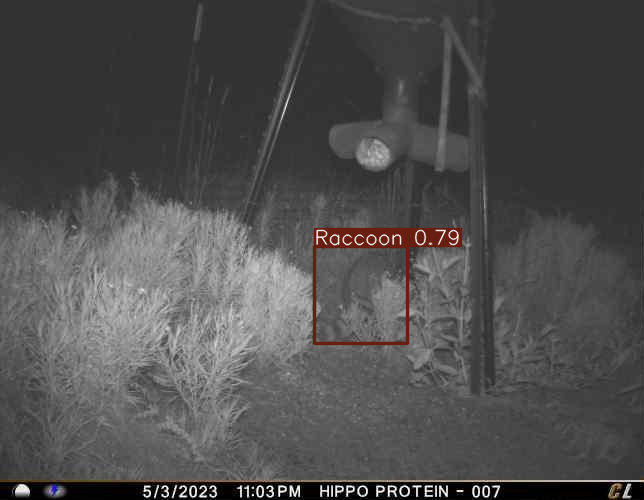

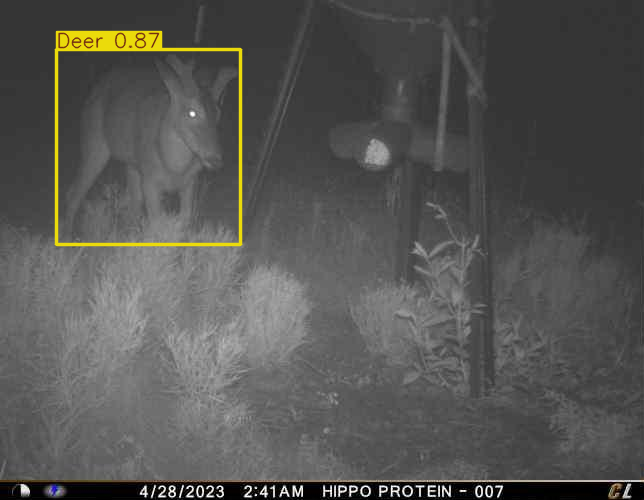

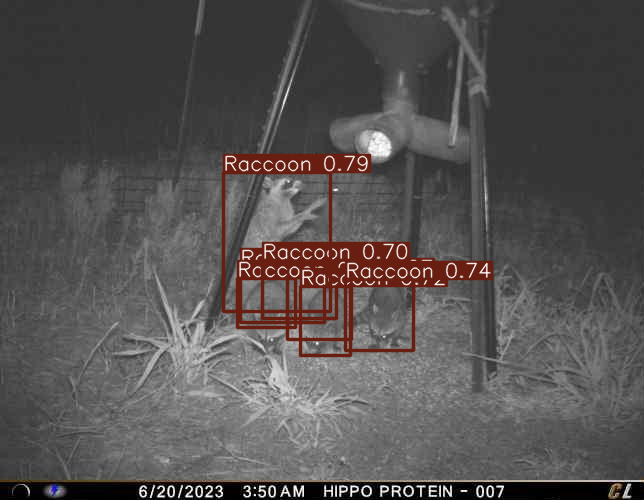

In [9]:
import glob
from PIL import Image
test_image=glob.glob('/content/My-Game-Pics-5/test/images/*.jpg')
results=model(test_image[4:8],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))



In [10]:
test_image=glob.glob('/content/6_class_final-1/test/images/*.jpg')
results=model(test_image[10],stream=False)
results[0].boxes.cls

IndexError: list index out of range

In [13]:
!pip install --upgrade gradio==4.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [12]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [14]:
import gradio as gr


def detect_img(img):

  results=model([img],stream=False)
  res=results[0].plot()
  return Image.fromarray(res)


them = gr.themes.Soft(primary_hue="sky", secondary_hue="stone", neutral_hue="neutral")


demo=gr.Interface(
    fn=detect_img,
    inputs=[gr.Image(format='pil')],
    outputs=[gr.Image(format = "pil")],
    theme=them,
    title = "Farming Animal Detection App",
    examples = test_image[10:15]

)


In [ ]:
demo.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://ff7e011dea10cdf33d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



0: 672x480 1 Coyote, 75.5ms
Speed: 5.9ms preprocess, 75.5ms inference, 1.5ms postprocess per image at shape (1, 3, 672, 480)
